#  Análisis ventas de video juegos

# Paso 1. Abrir archivo de datos y estudiar la información general

In [1]:
#descargar librería pandas
import pandas as pd

# Cargar el dataset
df = pd.read_csv('/datasets/games.csv')

# Ver las primeras filas
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar valores faltantes
print(df.isnull().sum())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

Se evidencia que en la preparación de los datos es necesario:
1 Cambiar tipo de datos en la columna year of release, es float debería ser tipo fecha.
2 User_score debería ser flotante.
3 Ajustar los nombres de las columnas porque todas inician con mayuscula
4 Analizar los valores ausentes en las columnas de Critic_Score, User_Score y  Rating. 



# Paso 2. Prepara los datos

In [2]:
# 1. Reemplazar los nombres de las columnas (minúsculas)
df.columns = df.columns.str.lower()

#2. Convertir a tipos de datos

# 'year_of_release' a int
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')  # Usamos Int64 para manejar NaNs


#Inspección valores unicos
print(df['year_of_release'].unique())

#eliminar valores
df = df[df['year_of_release'] != -9223372036854775808]

# 'user_score' a float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Eliminar duplicados
df.drop_duplicates(inplace=True)

#Verificar la conversión de tipos de datos
df.info()


<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), floa

Explicación:
- 'year_of_release' se convirtió a int porque los años son datos numéricos.
- 'user_score' se convirtió a float para permitir valores decimales y realizar cálculos más precisos.

In [3]:
#Tratamiento de valores ausentes
# Estadísticas descriptivas para revisar la media y la mediana y la posibilidad de usar estos valores para reemplazar los ausentes
print(df.describe())

# Se usa la mediana para reemplazar valores ausentes
df['user_score'].fillna(df['user_score'].median(), inplace=True)
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)



       year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16446.000000  16446.000000  16446.000000   
mean       2006.484616      0.264089      0.145945      0.078479   
std           5.877050      0.818416      0.506696      0.311082   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score   user_score  
count  16446.000000   7983.000000  7463.000000  
mean       0.047593     68.994363     7.126330  
std        0.187994     13.920060     1.499447  
min        0.000000     13.000000     0.000000  
25%        0.000000     60.000000     6.400000  
50%        0.010000     71.000000     7.500000  
75%        0.030000     79.000000     8.2000

La mediana es la medida de tendencia central más robusta en presencia de valores atípicos y sesgos, 
lo que la convierte en la mejor opción para imputar los valores faltantes en user_score y critic_score 
según sus estadísticas descriptivas. Esta ausencia de información en los puntajes asignados por criticos y usuarios,
se puede deber a que algunos juegos, especialmente los más antiguos o menos populares, no hayan recibido suficientes reseñas 
de usuarios, o que algunos juegos no traigan incorporado la función para que los usuarios den su feedback. 

Se eliminaron los valores TBD. Ya que indicaban que no se había lanzado el juego.


In [4]:
# Calculo de  las ventas totales para cada juego
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Muestra el DataFrame con la nueva columna 'total_sales'
print(df.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77          71.0         7.5    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00          71.0         7.5    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

# Paso 3. Analiza los datos

Cantidad de juegos lanzados por año:
year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


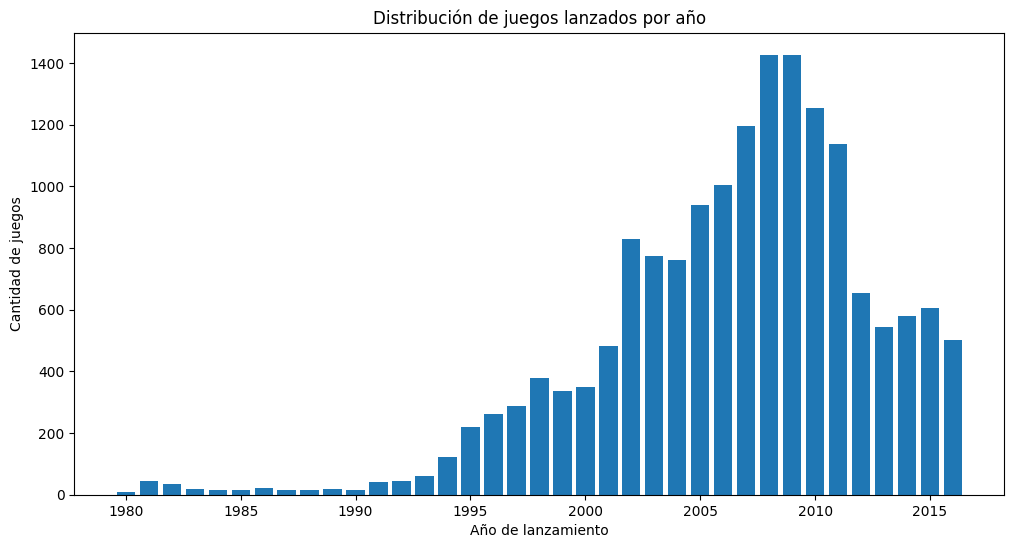

In [5]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

import matplotlib.pyplot as plt

# Cuenta la cantidad de juegos lanzados por año
games_per_year = df.groupby('year_of_release')['name'].count()

# Imprime la cantidad de juegos lanzados por año
print("Cantidad de juegos lanzados por año:")
print(games_per_year)

# Visualiza la distribución de juegos lanzados por año
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.title('Distribución de juegos lanzados por año')
plt.show()


Se puede observar que hay una concentración de lanzamientos de juegos entre los años 2006 al 2011. Y que esta tendencia de crecimiento inicia después de 1994, en donde se duplican los lanzamientos.  

# 3.1 Análisis de ventas por plataforma

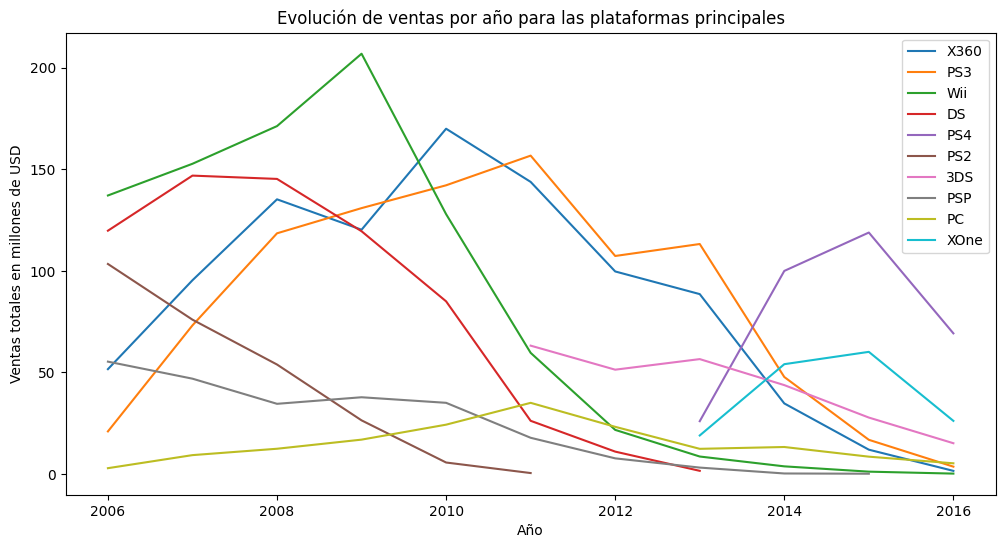

In [6]:
# Filtrar datos para el período relevante (ejemplo: desde 2010 para modelo de 2017)
df_relevant = df[df['year_of_release'] >= 2006]

# Ventas totales por plataforma en el período relevante
platform_sales = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Plataformas líderes en ventas
top_platforms = platform_sales.head(10)

# Evolución de ventas por plataforma
plt.figure(figsize=(12, 6))
for platform in top_platforms.index:
    platform_data = df_relevant[df_relevant['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_data.index, platform_data.values, label=platform)

plt.xlabel('Año')
plt.ylabel('Ventas totales en millones de USD')
plt.title('Evolución de ventas por año para las plataformas principales')
plt.legend()
plt.show()

El gráfico muestra la evolución de las ventas de las 10 plataformas de videojuegos más populares a lo largo del tiempo, desde 2006 hasta 2016. Podemos observar las siguientes tendencias:

Plataformas dominantes:

PS3 y X360: Estas plataformas dominaron el mercado a principios de la década de 2010, con ventas significativas y un crecimiento constante.
Wii: La Wii también tuvo un buen desempeño, pero sus ventas comenzaron a disminuir antes que las de PS3 y X360.
PS4: La PS4 se posicionó como una de las plataformas líderes a partir de 2014, superando a la X360 y acercándose a la PS3 en ventas.
Plataformas en declive:

DS, PS2, PSP: Estas plataformas muestran una clara tendencia a la baja en sus ventas a lo largo del tiempo.
Wii: Aunque tuvo un buen comienzo, sus ventas también disminuyeron gradualmente.
Plataformas emergentes:

PS4: La PS4 muestra un crecimiento constante y se posiciona como una de las plataformas líderes.
3DS y XOne: Estas plataformas tienen un crecimiento más lento en comparación con la PS4, pero muestran una tendencia positiva.
Plataformas con ventas estables:

PC: La PC se mantiene como una plataforma con ventas estables a lo largo del tiempo, sin grandes fluctuaciones.
Identificación de plataformas en crecimiento y declive
Plataformas en crecimiento: PS4, 3DS y XOne muestran un crecimiento positivo en sus ventas a lo largo del tiempo.
Plataformas en declive: DS, PS2, PSP y Wii muestran una clara tendencia a la baja en sus ventas.

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
El tiempo que toma en ser reemplazada cada plataforma por una nueva, depende del lanzamiento de una plataforma de una nueva generación, que mejore su rendimiento. Por ejemplo, comportamiento de la plataforma PS: el declive de la PS2 coincide con el crecimiento de la PS3, del mismo modo, el declive del PS3 coincide con el crecimiento del PS4. 

           count      mean       std   min     25%    50%     75%    max
platform                                                                
2600       116.0  0.745517  0.956160  0.07  0.3075  0.480  0.7800   7.81
3DO          3.0  0.033333  0.023094  0.02  0.0200  0.020  0.0400   0.06
3DS        512.0  0.503535  1.441271  0.01  0.0500  0.120  0.3325  14.60
DC          52.0  0.306731  0.468660  0.02  0.0775  0.135  0.2975   2.41
DS        2121.0  0.378491  1.436042  0.01  0.0500  0.110  0.2700  29.80
GB          97.0  2.622990  5.390925  0.06  0.3000  1.180  2.1800  31.38
GBA        811.0  0.385795  0.899654  0.01  0.0550  0.160  0.3900  15.84
GC         542.0  0.362970  0.693974  0.01  0.0600  0.150  0.3675   7.06
GEN         29.0  1.061034  1.470645  0.03  0.0700  0.150  1.7600   6.02
GG           1.0  0.040000       NaN  0.04  0.0400  0.040  0.0400   0.04
N64        316.0  0.689905  1.322189  0.01  0.1300  0.270  0.6000  11.90
NES         98.0  2.561735  5.108012  0.06  1.0000 

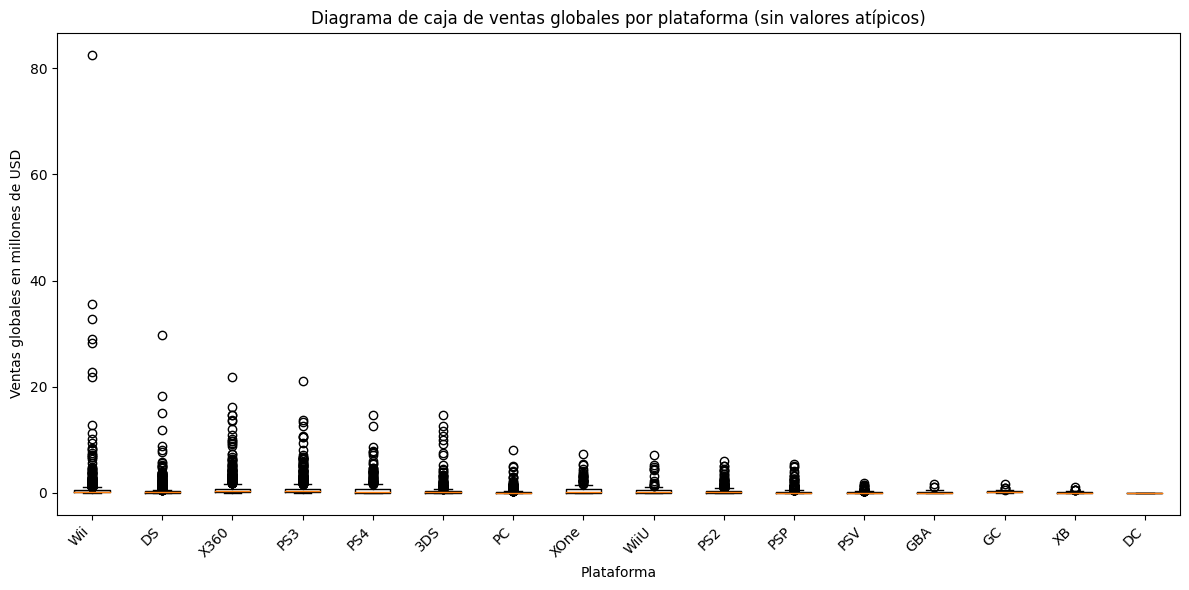

In [7]:
# Calcular estadísitcas descriptivas de ventas globales por plataforma
des_sales_per_platform = df.groupby('platform')['total_sales'].describe()

# Imprimir estads. descriptivas de ventas globales por plataforma
print(des_sales_per_platform)

# Diagrama de caja de ventas globales por plataforma SIN OUTLIERS
plt.figure(figsize=(12, 6))
plt.boxplot([df_relevant[df_relevant['platform'] == platform]['total_sales'] for platform in df_relevant['platform'].unique()], labels=df_relevant['platform'].unique(), showfliers=True) #showfliers=False para que no muestre los valores atípicos
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales en millones de USD')
plt.title('Diagrama de caja de ventas globales por plataforma (sin valores atípicos)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
#Limpiar outliers de total sales y rellenarlos con la mediana
def limpiar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar los índices de los outliers
    indices_outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)].index

    # Reemplazar los outliers con NaN
    df.loc[indices_outliers, columna] = float('nan')

    # Rellenar los NaN con la mediana 
    mediana = df[columna].median()
    df[columna].fillna(mediana, inplace=True)

# Limpiar outliers en 'total_sales' y reemplazar en el DataFrame original
limpiar_outliers_iqr(df, 'total_sales')

# Verificar que los outliers han sido limpiados
print(df['total_sales'].describe())



count    16446.000000
mean         0.217873
std          0.229804
min          0.000000
25%          0.060000
50%          0.130000
75%          0.290000
max          1.080000
Name: total_sales, dtype: float64



De acuerdo al gráfico de cajas y las estadísticas desccriptivas, se observan diferencias significativas en las ventas entre las plataformas. Algunas plataformas, como PS3, X360 y Wii, tienen una mayor dispersión en sus ventas, lo que indica que algunos juegos se vendieron mucho más que otros. Otras plataformas, como PS2, PSP y GBA, tienen una menor dispersión, lo que sugiere que sus ventas son más consistentes.

Las plataformas con mayores ventas promedio son PS3, X360 y Wii, lo que indica que estas plataformas tuvieron juegos con ventas muy altas. Las plataformas con menores ventas promedio son GBA, GC y DC, lo que sugiere que sus juegos no alcanzaron niveles de ventas tan altos.

Valores atípicos: La presencia de valores atípicos en algunas plataformas indica que hubo juegos con ventas excepcionalmente altas o bajas en comparación con el resto de los juegos en esa plataforma.

Asimetría: Algunas plataformas muestran una distribución asimétrica en sus ventas, lo que sugiere que la mayoría de los juegos se vendieron por debajo del promedio, mientras que unos pocos juegos se vendieron muy por encima del promedio.

# Reseñas en la plataforma PS4

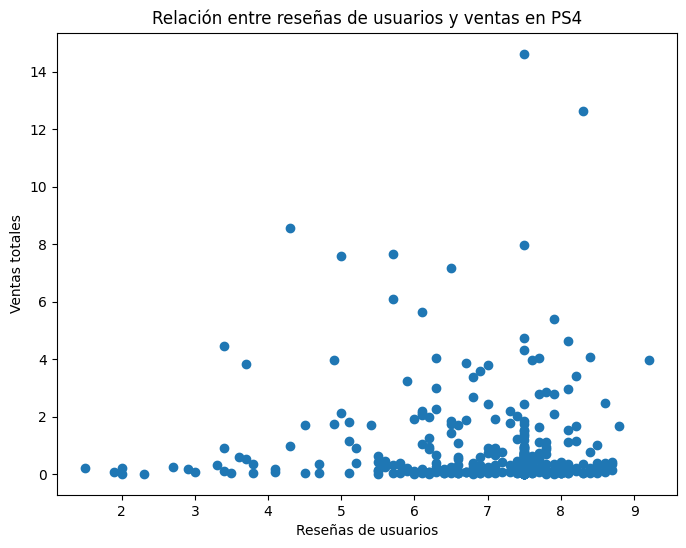

Correlación entre reseñas de usuarios y ventas en PS4: -0.06275557891282788


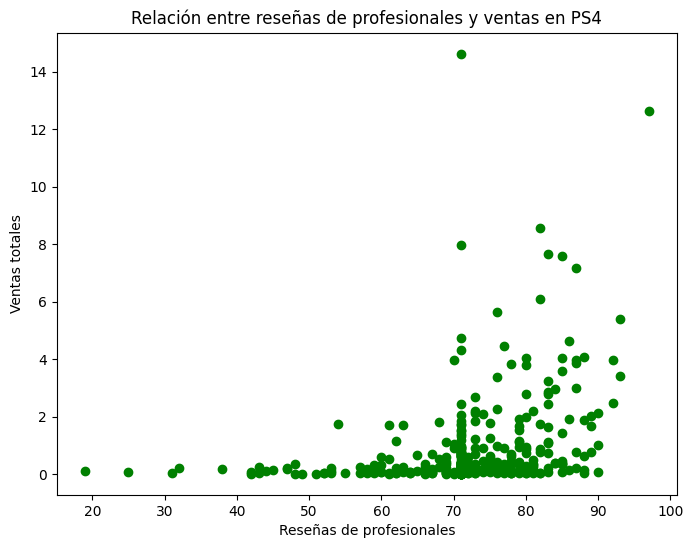

Correlación entre reseñas de profesionales y ventas en PS4: 0.3387064530024634


In [9]:
#Filtrar datos para ps4
df_ps4 = df_relevant[df_relevant['platform'] == 'PS4']

#Grafico de dispersión reseñas usuarios y ventas
plt.figure(figsize=(8, 6))
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'])
plt.xlabel('Reseñas de usuarios')
plt.ylabel('Ventas totales')
plt.title('Relación entre reseñas de usuarios y ventas en PS4')
plt.show()

correlation_user = df_ps4['user_score'].corr(df_ps4['total_sales'])
print(f'Correlación entre reseñas de usuarios y ventas en PS4: {correlation_user}')

#Gráfico dispersión reseñas profesionales y ventas

plt.figure(figsize=(8, 6))
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], color ="green")
plt.xlabel('Reseñas de profesionales')
plt.ylabel('Ventas totales')
plt.title('Relación entre reseñas de profesionales y ventas en PS4')
plt.show()

correlation_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])
print(f'Correlación entre reseñas de profesionales y ventas en PS4: {correlation_critic}')





La correlación entre las reseñas de usuarios y las ventas es negativa pero debil y cercana a 0, es decir que no hay una tendencia clara que indique que las ventas de juegos de PS4 estén directamente influenciadas por las reseñas de los usuarios.
Por otra parte, la correlación entre reseñas de profesionales y ventas, es positiva, por lo que se podría concluir que existe una tendencia a que juegos con mejores reseñas de profesionales también tengan mayores ventas en la plataforma PS4.


In [10]:
# Filtrar datos para PS4
df_ps4 = df_relevant[df_relevant['platform'] == 'PS4']

# Agrupar por juego y calcular ventas totales, incluyendo el género
ventas_por_juego = df_ps4.groupby(['name','genre'])['total_sales'].sum().sort_values(ascending=False)

# Mostrar los 10 juegos más vendidos
print(ventas_por_juego.head(10))

# Seleccionar un juego 1
juego1 = 'Call of Duty: Black Ops 3'

# Filtrar datos para el juego seleccionado
df_juego1 = df_relevant[df_relevant['name'] == juego1]

# Mostrar ventas por plataforma
print(f" Las ventas por plataforma para el juego: {juego1} son",df_juego1[['platform', 'total_sales']])


# Seleccionar un juego 2
juego2 = 'Grand Theft Auto V'

# Filtrar datos para el juego seleccionado
df_juego2 = df_relevant[df_relevant['name'] == juego2]

# Mostrar ventas por plataforma
print(f" Las ventas por plataforma para el juego: {juego2} son",df_juego2[['platform', 'total_sales']])

# Seleccionar un juego 3
juego3 = 'FIFA 16'

# Filtrar datos para el juego seleccionado
df_juego3 = df_relevant[df_relevant['name'] == juego3]

# Mostrar ventas por plataforma
print(f" Las ventas por plataforma para el juego: {juego3} son",df_juego3[['platform', 'total_sales']])



name                            genre       
Call of Duty: Black Ops 3       Shooter         14.63
Grand Theft Auto V              Action          12.62
FIFA 16                         Sports           8.58
Star Wars Battlefront (2015)    Shooter          7.98
Call of Duty: Advanced Warfare  Shooter          7.66
FIFA 17                         Sports           7.60
Fallout 4                       Role-Playing     7.17
FIFA 15                         Sports           6.08
Destiny                         Shooter          5.64
Uncharted 4: A Thief's End      Shooter          5.39
Name: total_sales, dtype: float64
 Las ventas por plataforma para el juego: Call of Duty: Black Ops 3 son      platform  total_sales
31        PS4        14.63
99       XOne         7.39
1049     X360         1.70
1062      PS3         1.69
6463       PC         0.26
 Las ventas por plataforma para el juego: Grand Theft Auto V son      platform  total_sales
16        PS3        21.05
23       X360        16.27
4

genre
Action          1116.65
Sports           793.85
Shooter          717.04
Misc             554.86
Role-Playing     522.40
Racing           299.00
Platform         279.74
Simulation       220.65
Fighting         188.42
Adventure        141.35
Puzzle            89.92
Strategy          73.14
Name: total_sales, dtype: float64


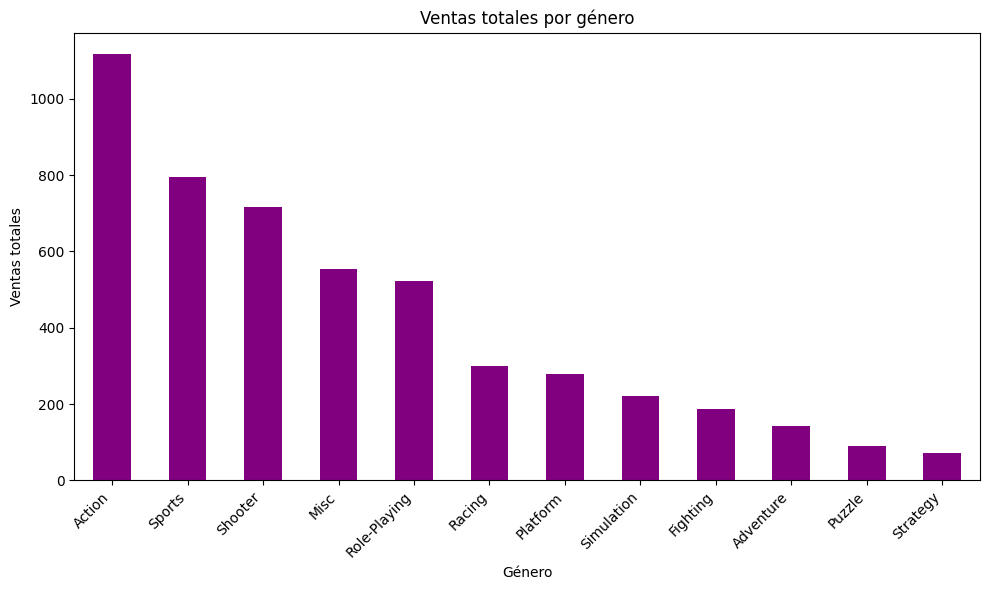

In [11]:
# Agrupar por género y calcular ventas totales
ventas_por_genero = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Mostrar los géneros más rentables
print(ventas_por_genero)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si lo deseas
ventas_por_genero.plot(kind='bar', color ="purple")
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar superposición de etiquetas
plt.show()


Géneros con ventas altas: Los géneros con ventas consistentemente altas suelen ser aquellos que atraen a un público amplio y que tienen una gran cantidad de juegos populares. Algunos ejemplos comunes son acción, deportes, disparos y rol.

Géneros con ventas bajas: Los géneros con ventas más bajas suelen ser aquellos que se dirigen a un público más especifico o que tienen una menor cantidad de juegos populares. Algunos ejemplos comunes son estrategia, simulación y aventura.

En general para los juegos más vendidos, si se ve una correspondencia con la categoría de acción, disparos, rol y deportes.  


# Paso 4. Crea un perfil de usuario para cada región

In [12]:
regiones = {'Norte America': 'na_sales', 'Europa': 'eu_sales', 'Japon': 'jp_sales'}

# Crear un diccionario para almacenar los resultados de cada región
resultados_plataformas = {}
resultados_generos = {}
resultados_esrb = {}

for region, ventas_columna in regiones.items():
    print(f"\n## Perfil de usuario para {region}")

    # 1. Plataformas principales
    print(f"\n### Plataformas principales en {region}")
    ventas_por_plataforma = df_relevant.groupby('platform')[ventas_columna].sum().sort_values(ascending=False)
    print(ventas_por_plataforma.head(5))
    resultados_plataformas[region] = ventas_por_plataforma.head(5)

    # 2. Géneros principales
    print(f"\n### Géneros principales en {region}")
    ventas_por_genero = df_relevant.groupby('genre')[ventas_columna].sum().sort_values(ascending=False)
    print(ventas_por_genero.head(5))
    resultados_generos[region] = ventas_por_genero.head(5)

    # 3. Impacto de clasificaciones ESRB
    print(f"\n### Impacto de clasificaciones ESRB en {region}")
    ventas_por_esrb = df_relevant.groupby('rating')[ventas_columna].sum()
    print(ventas_por_esrb)
    resultados_esrb[region] = ventas_por_esrb


## Perfil de usuario para Norte America

### Plataformas principales en Norte America
platform
X360    588.84
Wii     486.87
PS3     390.13
DS      323.99
PS2     114.89
Name: na_sales, dtype: float64

### Géneros principales en Norte America
genre
Action          530.44
Sports          396.64
Shooter         373.13
Misc            285.06
Role-Playing    199.63
Name: na_sales, dtype: float64

### Impacto de clasificaciones ESRB en Norte America
rating
E       796.98
E10+    315.40
EC        1.32
M       574.33
RP        0.00
T       424.14
Name: na_sales, dtype: float64

## Perfil de usuario para Europa

### Plataformas principales en Europa
platform
PS3     327.21
X360    267.89
Wii     258.32
DS      142.99
PS4     141.09
Name: eu_sales, dtype: float64

### Géneros principales en Europa
genre
Action     350.70
Sports     251.55
Shooter    238.89
Misc       146.88
Racing     113.39
Name: eu_sales, dtype: float64

### Impacto de clasificaciones ESRB en Europa
rating
E       461.09
E10

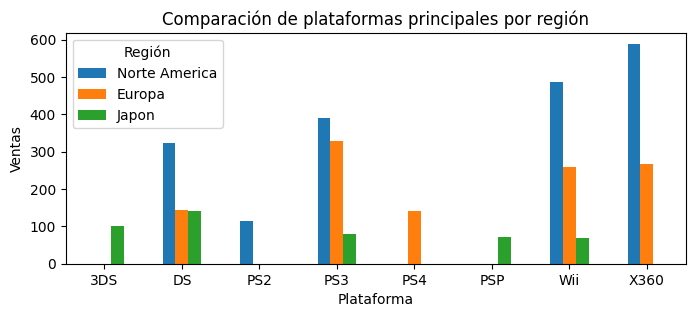

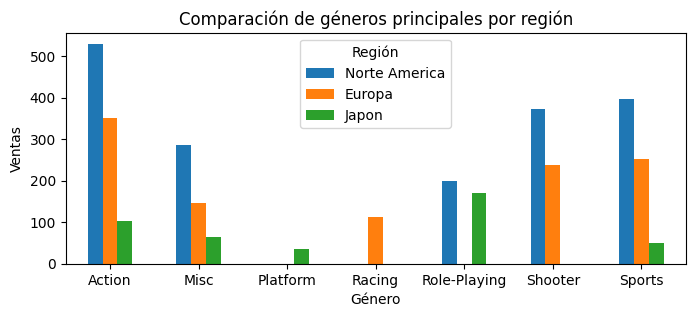

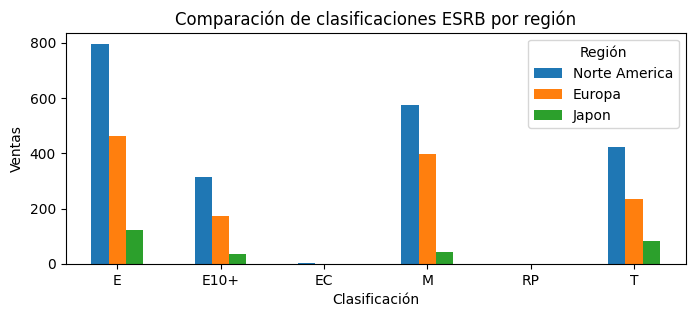

In [13]:
# Convertir los diccionarios a DataFrames
df_plataformas = pd.DataFrame(resultados_plataformas)
df_generos = pd.DataFrame(resultados_generos)


# Gráfico de barras agrupadas para plataformas principales
df_plataformas.plot(kind='bar', figsize=(8, 3))
plt.title('Comparación de plataformas principales por región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje x horizontales
plt.legend(title='Región')
plt.show()

# Gráfico de barras agrupadas para géneros principales
df_generos.plot(kind='bar', figsize=(8, 3))
plt.title('Comparación de géneros principales por región')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje x horizontales
plt.legend(title='Región')
plt.show()

# Gráfico de barras agrupadas para clasificaciones ESRB
df_esrb = pd.DataFrame({region: resultados_esrb[region] for region in regiones})
df_esrb.plot(kind='bar', figsize=(8, 3))
plt.title('Comparación de clasificaciones ESRB por región')
plt.xlabel('Clasificación')
plt.ylabel('Ventas')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje x horizontales
plt.legend(title='Región')
plt.show()

Perfil de usuario para cada región: 

Norte América
Plataformas principales: La X360 lidera el mercado, seguida por la Wii y la PS3. La DS y la PS2 también tienen una presencia importante.
Géneros principales: La acción, los deportes y los shooters son los géneros más populares. Los juegos de rol y las plataformas también tienen una buena acogida.
Impacto de clasificaciones ESRB: La clasificación E (Everyone) es la más vendida, seguida por la M (Mature) y la T (Teen). Esto sugiere que los juegos para todas las edades y los juegos para adultos tienen una gran demanda en Norte América.
Europa
Plataformas principales: La PS3 lidera el mercado, seguida por la X360 y la Wii. La PS4 y la PC también tienen una presencia importante.
Géneros principales: La acción, los deportes y los shooters son los géneros más populares, al igual que en Norte América. Los juegos de carreras también tienen una buena acogida.
Impacto de clasificaciones ESRB: La clasificación E (Everyone) es la más vendida, seguida por la M (Mature) y la T (Teen). Esto sugiere que, al igual que en Norte América, los juegos para todas las edades y los juegos para adultos tienen una gran demanda en Europa.
Japón
Plataformas principales: La DS lidera el mercado, seguida por la 3DS y la PS3. La PSP y la Wii también tienen una presencia importante.
Géneros principales: Los juegos de rol son el género más popular, seguido por la acción y los juegos misceláneos. Los juegos de deportes y plataformas también tienen una buena acogida.
Impacto de clasificaciones ESRB: La clasificación E (Everyone) es la más vendida, seguida por la T (Teen) y la M (Mature). Esto sugiere que, si bien los juegos para todas las edades son populares, los juegos para adolescentes y adultos también tienen una demanda considerable en Japón.
    
Conclusión general: 
    
En plataformas cada región difiere con respecto a cual puede liderar en ventas.
En géneros: En las tres regiones el género que está en el top es el de acción, seguido de deportes. Y en Japón gustan más los juegos de rol. 
En todas la regiones las clasificación E es la más vendida.


# Paso 5. Pruebas de hipótesis

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.

Con alfa = 0.05

Xbox One:
Media: 6.778947368421053
Varianza: 1.5895549850235344

PC:
Media: 6.969072164948454
Varianza: 1.9081519122048551
Valor p de Levene: 0.7204042297371858

Las varianzas son iguales (no rechazamos la hipótesis nula de igualdad de varianzas).

valor p: 0.05475199033573377

 No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que hay diferencias significativas en las calificaciones promedio de los usuarios entre Xbox One y PC.


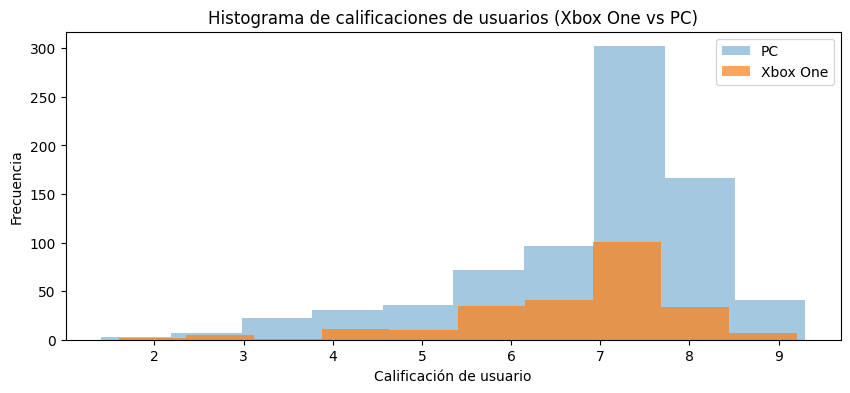

In [14]:
#Importar pruebas tstudent y levene de libreria scipy
from scipy.stats import levene, ttest_ind


# Filtrar datos para Xbox One y PC
df_xbox_one = df_relevant[df_relevant['platform'] == 'XOne']
df_pc = df_relevant[df_relevant['platform'] == 'PC']

# Calcular la media y la varianza para cada grupo
media_xbox_one = df_xbox_one['user_score'].mean()
varianza_xbox_one = df_xbox_one['user_score'].var()

media_pc = df_pc['user_score'].mean()
varianza_pc = df_pc['user_score'].var()

# Imprimir la media y la varianza para cada grupo
print("Xbox One:")
print(f"Media: {media_xbox_one}")
print(f"Varianza: {varianza_xbox_one}")

print("\nPC:")
print(f"Media: {media_pc}")
print(f"Varianza: {varianza_pc}")


#Realizar prueba LEVENE

result_levene= levene(df_xbox_one['user_score'], df_pc['user_score'])

print(f"Valor p de Levene: {result_levene.pvalue}")

# Verificar la igualdad de varianzas
alpha = 0.05
if result_levene.pvalue < alpha:
    print(
        "\nLas varianzas no son iguales (rechazamos la hipótesis nula de igualdad de varianzas)."
    )
    equal_var = False  # Para la prueba t de Student
else:
    print(
        "\nLas varianzas son iguales (no rechazamos la hipótesis nula de igualdad de varianzas)."
    )
    equal_var = True  # Para la prueba t de Student


# Realizar la prueba t de Student
result = ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var=equal_var)

print("\nvalor p:", result.pvalue)

# Comparar el valor p con alfa
alpha = 0.05
if result.pvalue < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en las calificaciones promedio de los usuarios entre Xbox One y PC.")
else:
    print("\n No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que hay diferencias significativas en las calificaciones promedio de los usuarios entre Xbox One y PC.")

# Crear histogramas superpuestos
plt.figure(figsize=(10, 4))

plt.hist(df_pc['user_score'], alpha=0.4, label='PC')
plt.hist(df_xbox_one['user_score'], alpha=0.7, label='Xbox One')

plt.title('Histograma de calificaciones de usuarios (Xbox One vs PC)')
plt.xlabel('Calificación de usuario')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()



Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son las mismas.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes no son las mismas.

Con alfa = 0.05

Acción:
Media: 7.15461796809404
Varianza: 1.1286367922515605

Deportes:
Media: 6.919572107765451
Varianza: 1.754850570133381

Valor p de Levene: 5.524450783445136e-06

Las varianzas no son iguales (rechazamos la hipótesis nula de igualdad de varianzas).

valor p: 5.8196917148340256e-08

Se rechaza la hipótesis nula. Hay diferencias significativas en las calificaciones promedio de los usuarios entre Acción y Deportes.


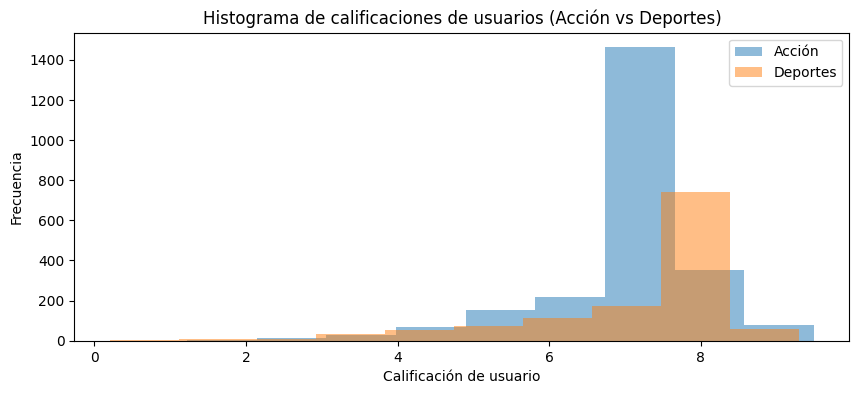

In [15]:
# Filtrar datos para Acción y Deportes
df_accion = df_relevant[df_relevant['genre'] == 'Action']
df_deportes = df_relevant[df_relevant['genre'] == 'Sports']

# Calcular la media y la varianza para cada grupo
media_accion = df_accion['user_score'].mean()
varianza_accion = df_accion['user_score'].var()

media_deportes = df_deportes['user_score'].mean()
varianza_deportes = df_deportes['user_score'].var()

# Imprimir la media y la varianza para cada grupo
print("Acción:")
print(f"Media: {media_accion}")
print(f"Varianza: {varianza_accion}")

print("\nDeportes:")
print(f"Media: {media_deportes}")
print(f"Varianza: {varianza_deportes}")

#Realizar prueba LEVENE

result_levene= levene(df_accion['user_score'], df_deportes['user_score'])

print(f"\nValor p de Levene: {result_levene.pvalue}")

# Verificar la igualdad de varianzas
alpha = 0.05
if result_levene.pvalue < alpha:
    print(
        "\nLas varianzas no son iguales (rechazamos la hipótesis nula de igualdad de varianzas)."
    )
    equal_var = False  # Para la prueba t de Student
else:
    print(
        "\nLas varianzas son iguales (no rechazamos la hipótesis nula de igualdad de varianzas)."
    )
    equal_var = True  # Para la prueba t de Student



# Realizar la prueba t de Student
result = ttest_ind(df_accion['user_score'], df_deportes['user_score'], equal_var=equal_var)

# Imprimir resultados
print("\nvalor p:",result.pvalue)

# Comparar el valor p con alfa
alpha = 0.05
if result.pvalue < alpha:
    print("\nSe rechaza la hipótesis nula. Hay diferencias significativas en las calificaciones promedio de los usuarios entre Acción y Deportes.")
else:
    print("\nNo se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que hay diferencias significativas en las calificaciones promedio de los usuarios entre Acción y Deportes.")

#Crear histograma
plt.figure(figsize=(10, 4))

plt.hist(df_accion['user_score'], alpha=0.5, label='Acción')
plt.hist(df_deportes['user_score'], alpha=0.5, label='Deportes')

plt.title('Histograma de calificaciones de usuarios (Acción vs Deportes)')
plt.xlabel('Calificación de usuario')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()
    
    


# Paso 6. Conclusiones

Este proyecto ha explorado el análisis de datos de ventas de videojuegos para identificar tendencias, patrones y relaciones entre diferentes variables. A través del análisis de datos y la aplicación de técnicas de visualización y pruebas de hipótesis, se han obtenido las siguientes conclusiones para tener en cuenta en la campaña para 2017:

Influencia de las reseñas en las ventas: Se ha observado una correlación positiva, aunque no necesariamente causal, entre las reseñas de usuarios y profesionales y las ventas de videojuegos. En general, los juegos con mejores reseñas tienden a vender más, aunque esta relación puede variar según la plataforma y el género del juego.

Preferencias regionales: Se han identificado diferencias significativas en las preferencias de plataformas y géneros entre las diferentes regiones geográficas (Norte América, Europa y Japón). Estas diferencias sugieren que las empresas de videojuegos deben adaptar sus estrategias de marketing y desarrollo de juegos a las particularidades de cada mercado regional.

Impacto de las clasificaciones ESRB: Las clasificaciones ESRB, que indican el rango de edad recomendado para los juegos, parecen tener un impacto en las ventas, aunque este impacto puede variar según la región. Es importante considerar las clasificaciones ESRB al desarrollar y comercializar videojuegos, ya que pueden influir en la decisión de compra de los consumidores.

Análisis de plataformas y géneros: Se han identificado las plataformas y géneros de videojuegos más populares en cada región, lo que permite a las empresas de videojuegos enfocar sus esfuerzos en aquellos mercados y productos con mayor potencial de éxito.

Pruebas de hipótesis: Se han realizado pruebas de hipótesis, con las que se puede concluir que si existen diferencias significativas en las calificaciones promedio de los usuarios entre los géneros más populares (Acción y Deportes). 


Claro, aquí tienes una conclusión general que abarca los aspectos clave del proyecto que has desarrollado:

Conclusiones generales del proyecto
Este proyecto ha explorado el análisis de datos de ventas de videojuegos para identificar tendencias, patrones y relaciones entre diferentes variables. A través del análisis de datos y la aplicación de técnicas de visualización y pruebas de hipótesis, se han obtenido las siguientes conclusiones principales:

Influencia de las reseñas en las ventas: Se ha observado una correlación positiva, aunque no necesariamente causal, entre las reseñas de usuarios y profesionales y las ventas de videojuegos. En general, los juegos con mejores reseñas tienden a vender más, aunque esta relación puede variar según la plataforma y el género del juego.

Preferencias regionales: Se han identificado diferencias significativas en las preferencias de plataformas y géneros entre las diferentes regiones geográficas (Norte América, Europa y Japón). Estas diferencias sugieren que las empresas de videojuegos deben adaptar sus estrategias de marketing y desarrollo de juegos a las particularidades de cada mercado regional.

Impacto de las clasificaciones ESRB: Las clasificaciones ESRB, que indican el rango de edad recomendado para los juegos, parecen tener un impacto en las ventas, aunque este impacto puede variar según la región. Es importante considerar las clasificaciones ESRB al desarrollar y comercializar videojuegos, ya que pueden influir en la decisión de compra de los consumidores.

Análisis de plataformas y géneros: Se han identificado las plataformas y géneros de videojuegos más populares en cada región, lo que permite a las empresas de videojuegos enfocar sus esfuerzos en aquellos mercados y productos con mayor potencial de éxito.

Pruebas de hipótesis: Se han realizado pruebas de hipótesis para evaluar si existen diferencias significativas en las calificaciones promedio de los usuarios entre diferentes plataformas y géneros. Los resultados de estas pruebas proporcionan información valiosa para la toma de decisiones en la industria de los videojuegos.

Recomendaciones
Segmentación de mercado: Las empresas de videojuegos pueden utilizar esta información para segmentar el mercado y adaptar sus estrategias de marketing y desarrollo de juegos a las preferencias de cada región para 2017. 
Estudios de mercado: Se recomienda realizar estudios de mercado más profundos para comprender las razones detrás de las diferencias regionales en las preferencias de los jugadores.
Análisis continuo: El mercado de videojuegos está en constante evolución, por lo que es importante realizar un análisis continuo de las tendencias y preferencias de los jugadores para adaptar las estrategias de negocio.
